In [14]:
import math,random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.centroidIdx = None
    def assignCentre(self,centers):
        distances = []
        for i in range(len(centers)):
            dist = math.sqrt(pow((self.x-centers[i].x),2)+pow((self.y-centers[i].y),2))
            distances.append(dist)
        idmin = min(range(len(distances)), key=distances.__getitem__)
        self.centroidIdx = idmin
        self.centerPointx = centers[idmin].x
        self.centerPointy = centers[idmin].y


In [3]:
def getNewCentre(allPoints,nCluster):
    clusterSumx = [0]*nCluster
    clusterSumy = [0]*nCluster
    nPoints = [0]*nCluster
    for i in range(len(allPoints)):
        clusterSumx[allPoints[i].centroidIdx] += allPoints[i].x
        clusterSumy[allPoints[i].centroidIdx] += allPoints[i].y
        nPoints[allPoints[i].centroidIdx] += 1
    newCentre = []
    for i in range(nCluster):
        newCentre.append(Point(clusterSumx[i]/nPoints[i], clusterSumy[i]/nPoints[i]))
    return newCentre

def assignToCluster(allPoints, centres):
    for i in range(len(allPoints)):
        allPoints[i].assignCentre(centres)
        
def resetCentre(oldCentres, newCentres):
    required = False
    for i in range(len(oldCentres)):
        if(abs(math.sqrt(pow((oldCentres[i].x-newCentres[i].x),2)+pow((oldCentres[i].y-newCentres[i].y),2)))>0.0000001):
            required = True
    return newCentres, required

Random centers:
2.0 5.0
6.0 4.0
5.0 8.0
Centres:
1.5 3.5 Cluster no.: 1
7.0 4.333333333333333 Cluster no.: 2
3.6666666666666665 9.0 Cluster no.: 3


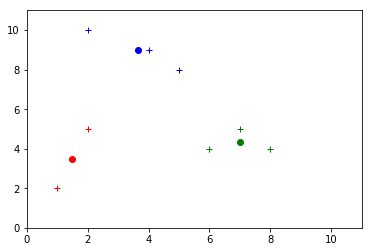

In [41]:
numberOfCentres = 3
mx = -100000
# lines = [line.rstrip('\n') for line in open('input.txt')]
lines = [line.rstrip('\n') for line in open('inputdip.txt')]
allPoints = []
centres = []
idxs = []
colors = ['r','g','b','c','m','y','k','C7','C5','C6']
for i in range(len(lines)):
#     point = lines[i].split(",")
    point = lines[i].split(" ")
    mx = max(mx, 1 + int(point[0]))
    mx = max(mx, 1 + int(point[1]))
    allPoints.append(Point(float(point[0]),float(point[1])))
while(True):
    r = random.randint(0,(len(allPoints)-1))
    if r not in idxs:
        idxs.append(r)
        centres.append(allPoints[r])
        if(len(centres)==numberOfCentres):
            break
cnt = 1
print("Random centers:")
for i in range(len(centres)):
        print(str(centres[i].x) + " " + str(centres[i].y))
while True:
    assignToCluster(allPoints, centres)
    centres, ret = resetCentre(centres, getNewCentre(allPoints, numberOfCentres))
#     print("Epoch: " + str(cnt))
#     print("Centres:")
#     for i in range(len(centres)):
#         print(str(centres[i].x) + " " + str(centres[i].y) + " Cluster no.: " + str(1 + i))
#     # print("Points:")
#     # for i in range(len(allPoints)):
#     #     print(str(allPoints[i].x) + " " + str(allPoints[i].y) + " Cluster no.: " + str(1 + allPoints[i].centroidIdx))
    if(not ret):
        break
    cnt += 1
    
    
print("Centres:")
for i in range(len(centres)):
    print(str(centres[i].x) + " " + str(centres[i].y) + " Cluster no.: " + str(1 + i))
# print("Points:")
# for i in range(len(allPoints)):
#     print(str(allPoints[i].x) + " " + str(allPoints[i].y) + " Cluster no.: " + str(1 + allPoints[i].centroidIdx))
for m in range(numberOfCentres):
    x = []
    y = []
    for n in range(len(allPoints)):
        if(allPoints[n].centroidIdx == m):
            x.append(allPoints[n].x)
            y.append(allPoints[n].y)
    plt.plot(x,y,colors[m]+'+')
    plt.plot([centres[m].x], centres[m].y, colors[m]+'o')
plt.axis([0, mx, 0, mx])
plt.show()